In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

#import pycaret
#from pycaret.regression import *

In [115]:
cmap='seismic'
sns.set_palette(sns.color_palette(cmap))

In [116]:
df = pd.read_csv('Concrete_Data.csv', header=None)
df.columns =['Cement ', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Concrete compressive strength']
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [117]:
df.isna().sum() # no missing values in the dataframe

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64

In [118]:
df.columns

Index(['Cement ', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength'],
      dtype='object')

array([[<AxesSubplot: title={'center': 'Cement '}>,
        <AxesSubplot: title={'center': 'Blast Furnace Slag'}>,
        <AxesSubplot: title={'center': 'Fly Ash'}>],
       [<AxesSubplot: title={'center': 'Water'}>,
        <AxesSubplot: title={'center': 'Superplasticizer'}>,
        <AxesSubplot: title={'center': 'Coarse Aggregate'}>],
       [<AxesSubplot: title={'center': 'Fine Aggregate'}>,
        <AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Concrete compressive strength'}>]],
      dtype=object)

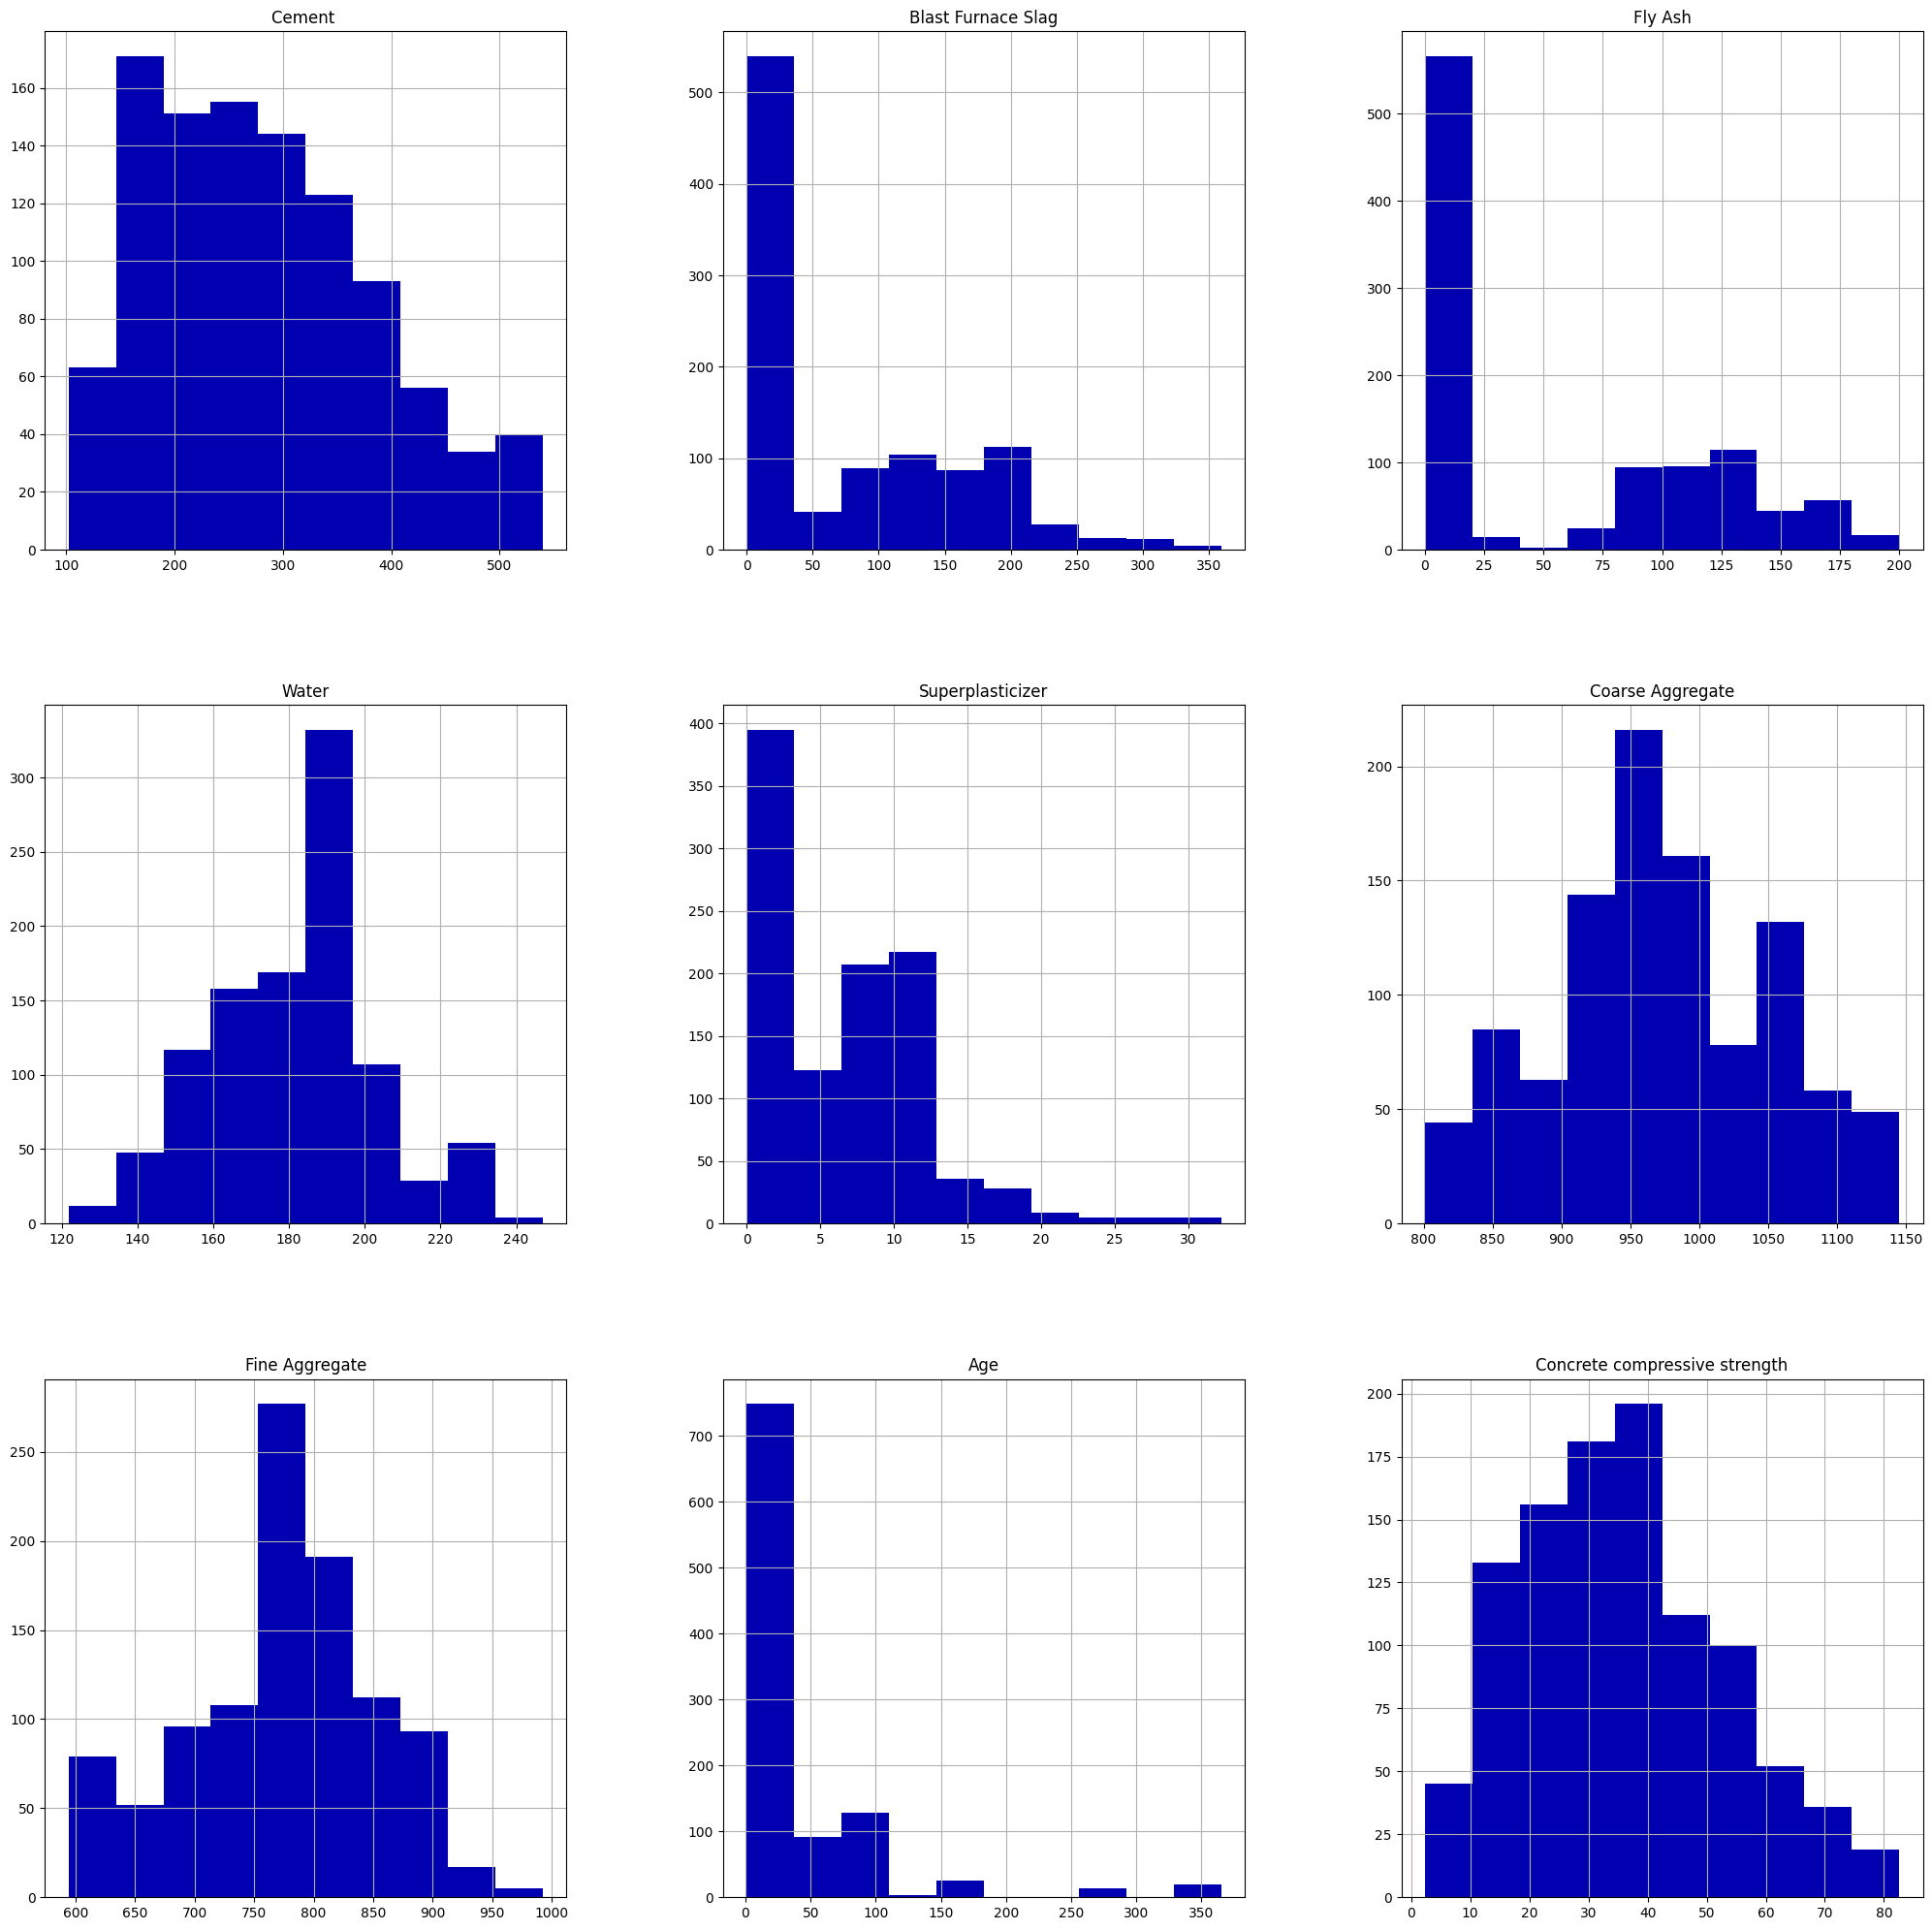

In [119]:
# visualizing the dataframe
df.hist(figsize=(25,25))

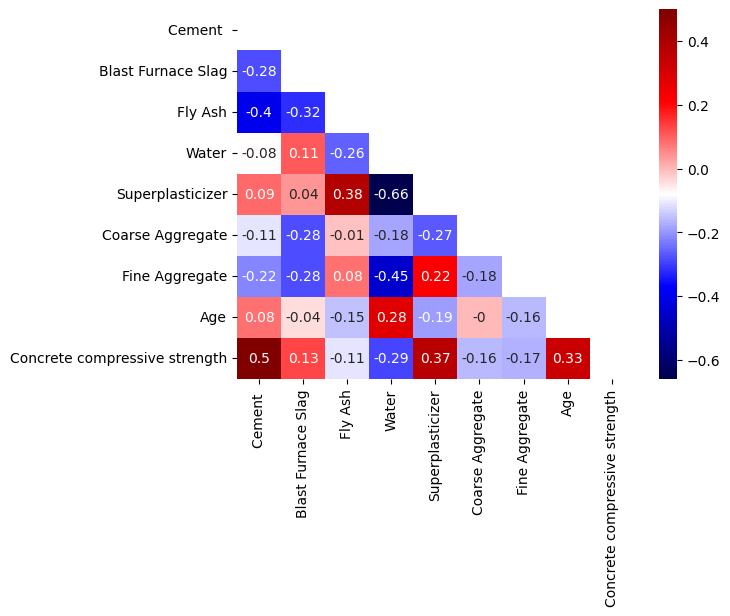

In [120]:
correlation_matrix = df.corr().round(2)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(data=correlation_matrix, annot=True,cmap=cmap,mask=mask)
plt.savefig("visualizations/correlation_matrix_.png",bbox_inches='tight')

In [121]:
# checking with pycaret
#s = setup(data=df, target='Concrete compressive strength', silent=True, session_id=123)

In [122]:
#best = compare_models()

In [123]:
#print(best)

The Min-Max Scaling uses the minimum and maximum value of a feature to rescale values within a range typically between 0 to 1 or -1 to 1. The shape of the distribution doesn’t change. 

In [12]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

NameError: name 'X_train' is not defined

In [68]:
col_names = list(df.columns)
df = df.values #returns a numpy array
min_max_scaler = MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df)
df = pd.DataFrame(df_scaled, columns=col_names)
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,1.000000,0.000000,0.000000,0.321086,0.077640,0.694767,0.205720,0.074176,0.967485
1,1.000000,0.000000,0.000000,0.321086,0.077640,0.738372,0.205720,0.074176,0.741996
2,0.526256,0.396494,0.000000,0.848243,0.000000,0.380814,0.000000,0.739011,0.472655
3,0.526256,0.396494,0.000000,0.848243,0.000000,0.380814,0.000000,1.000000,0.482372
4,0.220548,0.368392,0.000000,0.560703,0.000000,0.515698,0.580783,0.986264,0.522860
...,...,...,...,...,...,...,...,...,...
1025,0.398174,0.322760,0.451274,0.461661,0.276398,0.200872,0.437280,0.074176,0.522611
1026,0.502740,0.000000,0.577711,0.592652,0.322981,0.049128,0.550426,0.074176,0.359412
1027,0.106164,0.387869,0.542729,0.566294,0.189441,0.265698,0.466633,0.074176,0.266226
1028,0.130365,0.519477,0.000000,0.429712,0.350932,0.548256,0.488961,0.074176,0.379220


array([[<AxesSubplot: title={'center': 'Cement '}>,
        <AxesSubplot: title={'center': 'Blast Furnace Slag'}>,
        <AxesSubplot: title={'center': 'Fly Ash'}>],
       [<AxesSubplot: title={'center': 'Water'}>,
        <AxesSubplot: title={'center': 'Superplasticizer'}>,
        <AxesSubplot: title={'center': 'Coarse Aggregate'}>],
       [<AxesSubplot: title={'center': 'Fine Aggregate'}>,
        <AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Concrete compressive strength'}>]],
      dtype=object)

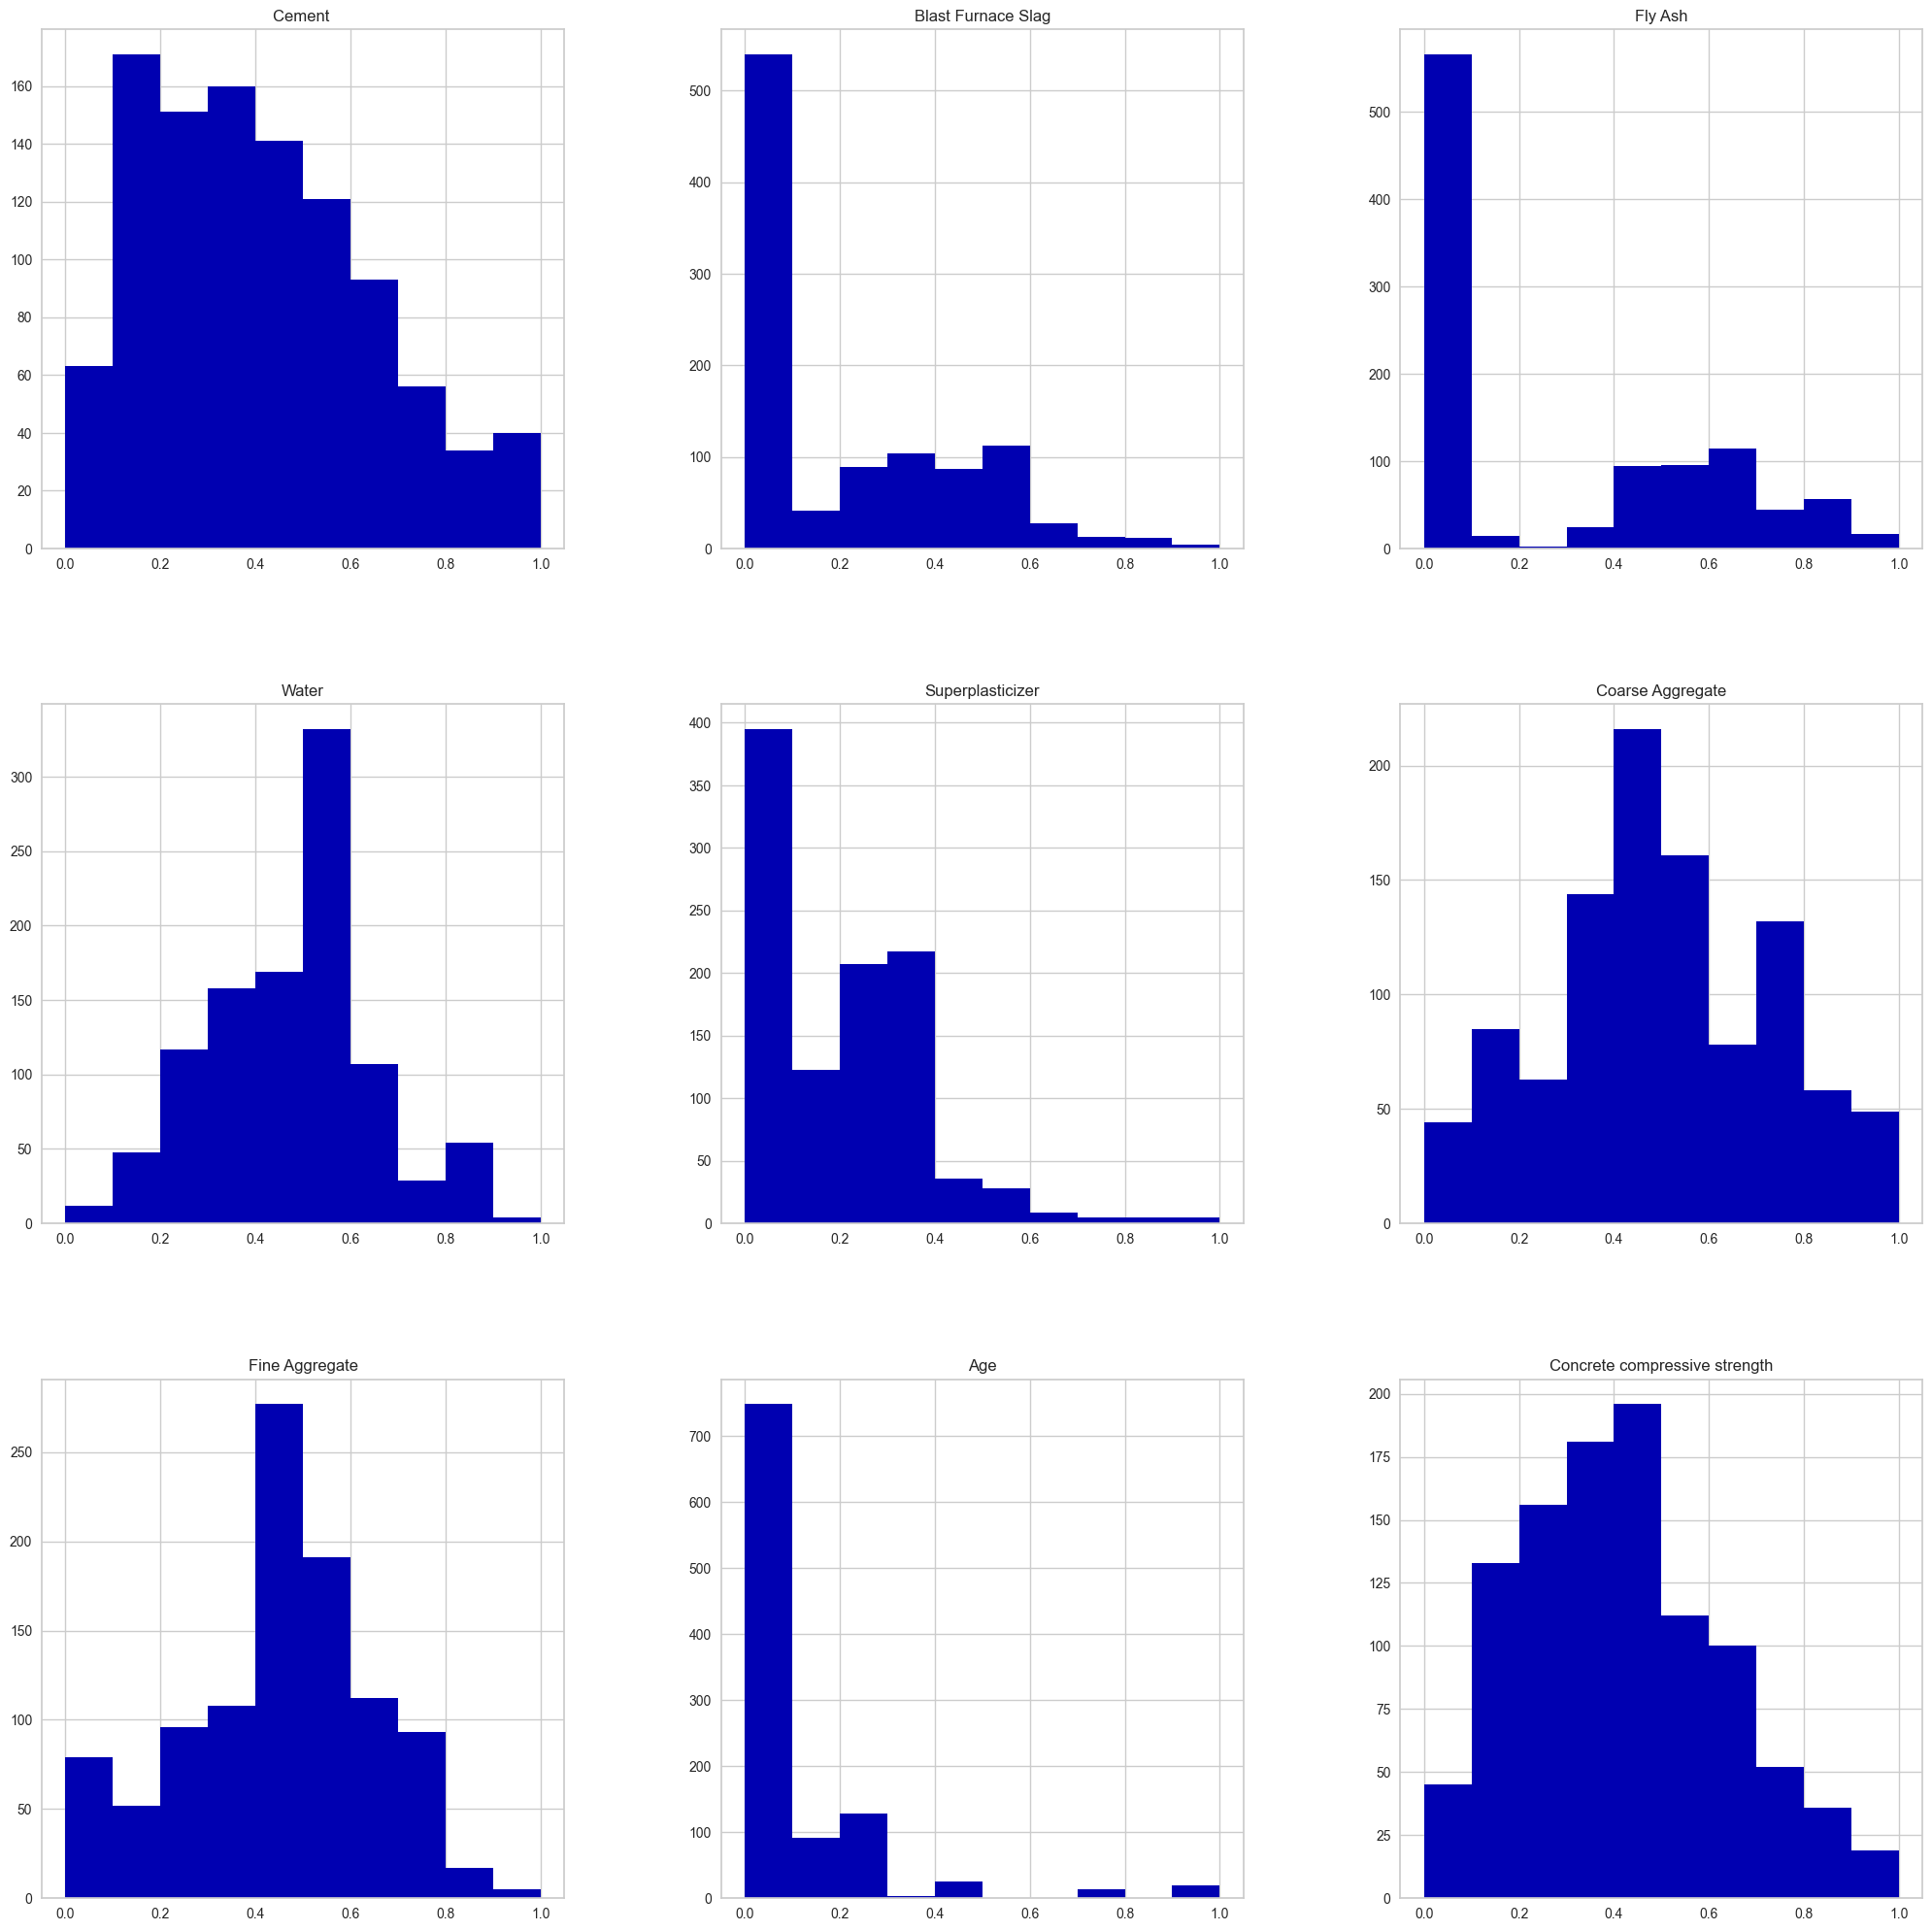

In [69]:
df.hist(figsize=(25,25)) # The shape of the distribution doesn’t change. 

In [70]:
X = df[['Cement ', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 
        'Fine Aggregate', 'Age']]
y = df['Concrete compressive strength'] # the target

In [71]:
# Splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(721, 8)
(309, 8)
(721,)
(309,)


--------------------------
The **Mean Squared Error (MSE)** is a risk metric corresponding to the expected value of the squared (quadratic) error or loss defined as

$$
MSE = \frac{1}{N}|| \textbf{y} - \hat{\textbf{y}} ||_{2}^{2}.
$$

The **Mean Absolute Error (MAE)** is a risk metric corresponding to the expected value of the absolute error loss and it is defined as 

$$
MAE = \frac{1}{N}|| \textbf{y} - \hat{\textbf{y}} ||_{1}.
$$

The **Mean Absolute Percentage Error (MAPE)** expresses the accuracy as a ratio defined by the formula

$$
MAPE = \frac{1}{N} \sum_{i=1}^{N} |\frac{y(i)-\hat{y}(i)}{y(i)}| .
$$

---------------------
# Ordinary Least Squares regression (OLS) 

In [72]:
regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_train)

In [73]:
def MAPE(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / np.maximum(np.ones(len(y_true)), np.abs(y_true))))*100

In [74]:
print("The model performance for training set")
print("--------------------------------------")
# The mean squared error                               
print("Mean squared error (MSE): %.2f" % mean_squared_error(y_train, y_pred))
# Mean absolute error                                                           
print('Mean absolute error (MAE): %.2f' % mean_absolute_error(y_train, y_pred))
# Mean absolute error                                                           
print('Mean Absolute Percentage Error (MAPE): %.2f' % MAPE(y_train, y_pred))

The model performance for training set
--------------------------------------
Mean squared error (MSE): 0.02
Mean absolute error (MAE): 0.10
Mean Absolute Percentage Error (MAPE): 10.18


In [77]:
# model evaluation for testing set
y_test_pred = regr.predict(X_test)

# The mean squared error                               
print("Mean squared error (MSE): %.2f" % mean_squared_error(y_test, y_test_pred))
# Mean absolute error                                                           
print('Mean absolute error (MAE): %.2f' % mean_absolute_error(y_test, y_test_pred))
# Mean absolute error                                                           
print('Mean Absolute Percentage Error (MAPE): %.2f' % MAPE(y_test, y_test_pred))

Mean squared error (MSE): 0.02
Mean absolute error (MAE): 0.10
Mean Absolute Percentage Error (MAPE): 10.34


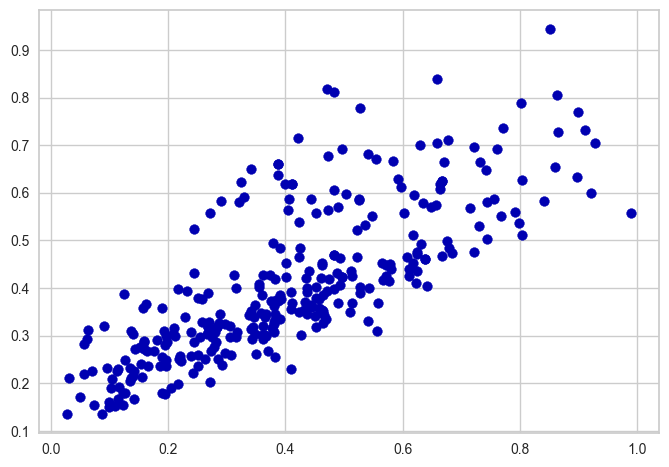

In [78]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(y_test, y_test_pred)
plt.show()

# Ridge

In [53]:
_lambda = 0.1
clf_ridge = Ridge(alpha=_lambda).fit(X_train, y_train)
yridge = clf_ridge.predict(X_train)

In [54]:
# The mean squared error                               
print("Mean squared error (MSE): %.2f" % mean_squared_error(y_train, yridge))
# Mean absolute error                                                           
print('Mean absolute error (MAE): %.2f' % mean_absolute_error(y_train, yridge))
# Mean absolute error                                                           
print('Mean Absolute Percentage Error (MAPE): %.2f' % MAPE(y_train, yridge))

Mean squared error (MSE): 0.02
Mean absolute error (MAE): 0.10
Mean Absolute Percentage Error (MAPE): 10.20


# LASSO